In [1]:
import numpy as np
import pandas as pd
from time import time

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns; sns.set() 

import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import re
from numpy import random
import seaborn as sb
import matplotlib.pyplot as plt

rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)

set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

filename = 'gbm_tsn.csv'
datanew = pd.read_csv(filename)
datanew.describe

<bound method NDFrame.describe of              F1         F2  Class     F3               F4
0     19.555715 -66.420423  Tumor  BT_S2       Neoplastic
1    -66.467768  -4.840194  Tumor  BT_S2  Oligodendrocyte
2      8.197811 -63.763646  Tumor  BT_S2       Neoplastic
3     -6.468824 -51.283635  Tumor  BT_S2       Neoplastic
4     -9.436247 -53.896430  Tumor  BT_S2       Neoplastic
...         ...        ...    ...    ...              ...
3584  40.472940 -49.749664  Tumor  BT_S6         Vascular
3585 -12.666931  -3.672656  Tumor  BT_S6           Immune
3586  41.667127 -49.692359  Tumor  BT_S6         Vascular
3587  40.824259 -49.044548  Tumor  BT_S6         Vascular
3588  41.268709 -49.409236  Tumor  BT_S6         Vascular

[3589 rows x 5 columns]>

In [2]:
y = datanew['F4'].values
X = datanew.drop(['Class', 'F3', 'F4'], axis=1)

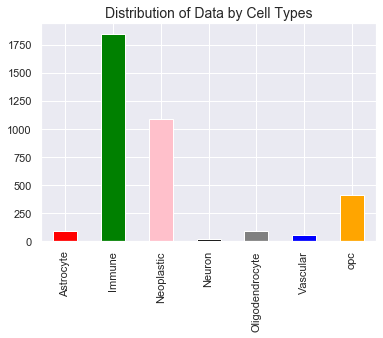

In [3]:
#patterns_colors = ['Red','Yellow','#996633', 'Green', 'Blue']

patterns_colors = ['red','green','pink', 'black', 'gray', 'blue', 'orange']

patterns_labels = ['Astrocyte', 'Immune', 'Neoplastic', 'Neuron', 'Oligodendrocyte', 'Vascular', 'opc']

correct_Pattern_labels = datanew['F4'].values

patterns_counts = datanew['F4'].value_counts().sort_index()

patterns_counts.index = patterns_labels

patterns_counts.plot(kind='bar',color=patterns_colors,
                         title='Distribution of Data by Cell Types')
patterns_counts
plt.show()

In [4]:
patterns_counts

Astrocyte            88
Immune             1847
Neoplastic         1091
Neuron               21
Oligodendrocyte      85
Vascular             51
opc                 406
Name: F4, dtype: int64

In [5]:
# Separate input features (X) and target variable (y)
y = datanew.F4
X = datanew.drop(columns=['Class', 'F3', 'F4'])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

forest = RandomForestClassifier(n_estimators=2500, random_state=0, max_depth = 6)
forest.fit(X_train,y_train)
y_score = forest.predict(X_test)

In [7]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(accuracy_score(y_score, y_test))
print(confusion_matrix(y_score, y_test))
print(classification_report(y_score, y_test))

0.9986072423398329
[[ 20   0   0   0   0   0   0]
 [  0 387   0   0   0   1   0]
 [  0   0 209   0   0   0   0]
 [  0   0   0   6   0   0   0]
 [  0   0   0   0  12   0   0]
 [  0   0   0   0   0  11   0]
 [  0   0   0   0   0   0  72]]
                 precision    recall  f1-score   support

      Astrocyte       1.00      1.00      1.00        20
         Immune       1.00      1.00      1.00       388
     Neoplastic       1.00      1.00      1.00       209
         Neuron       1.00      1.00      1.00         6
Oligodendrocyte       1.00      1.00      1.00        12
       Vascular       0.92      1.00      0.96        11
            opc       1.00      1.00      1.00        72

       accuracy                           1.00       718
      macro avg       0.99      1.00      0.99       718
   weighted avg       1.00      1.00      1.00       718

